In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from plotnine import *
%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

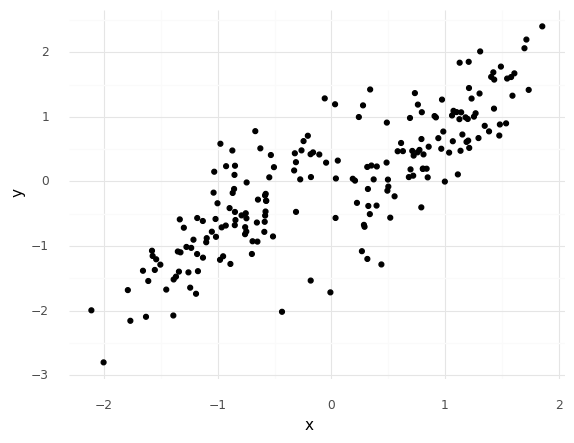

<ggplot: (197531958125)>

In [36]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

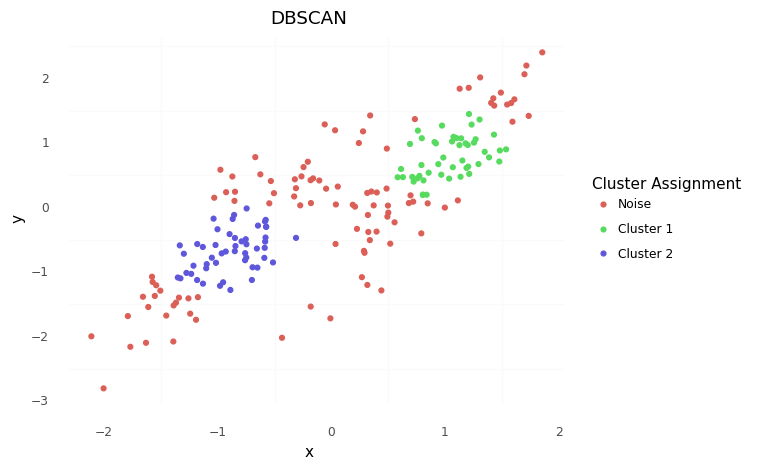

<ggplot: (197540190902)>

In [107]:
# dbscan and plot
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN"))


DBSCAN Score:  0.16222332375489312


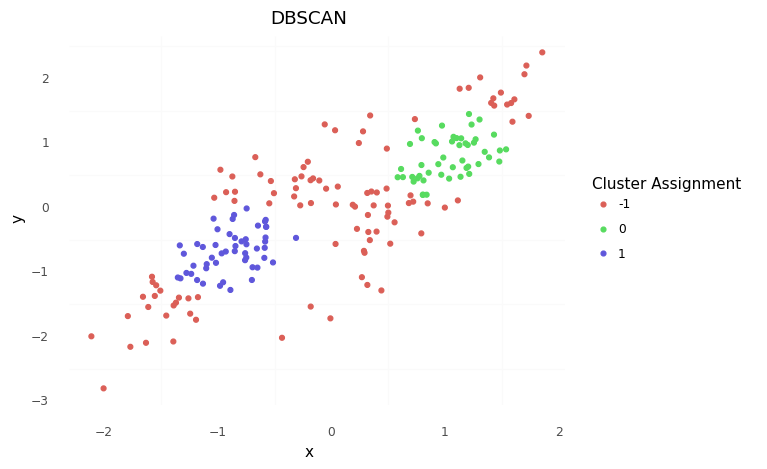


Hierarchical Agglomeretive score:  0.5072921620254586


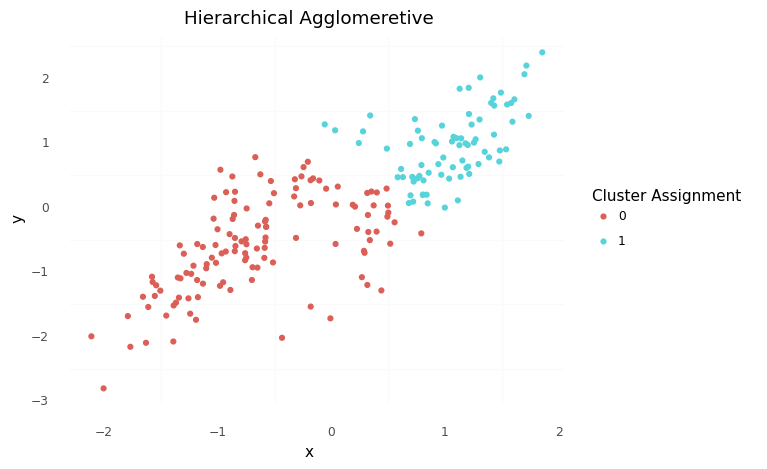


KMeans Score:  0.5319247935472973


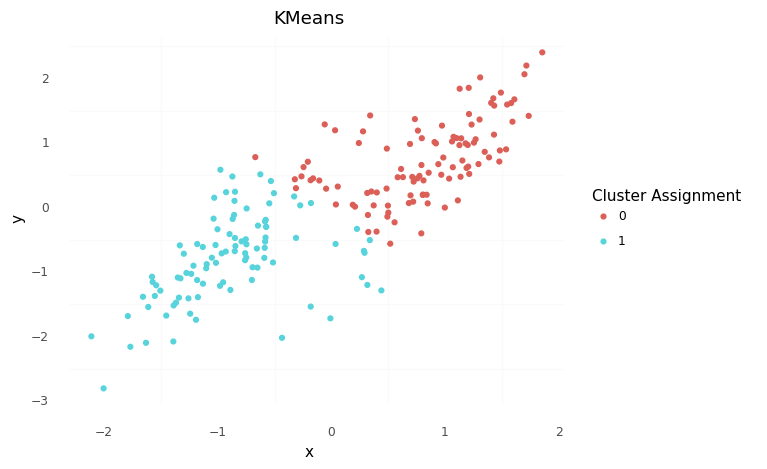


GMM:  0.45114087997192337


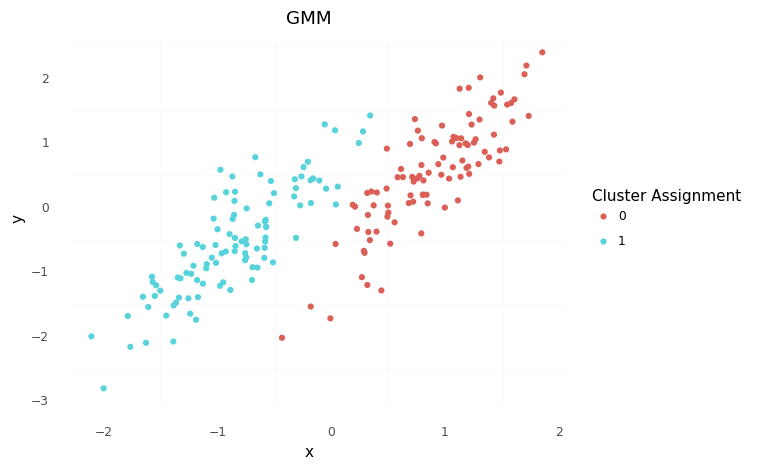

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac1 = AgglomerativeClustering(2)
km1 = KMeans(2)
gm1 = GaussianMixture(2)
db1 = DBSCAN(eps = .5, min_samples = 35)

hac1.fit(d1[["x","y"]])
km1.fit(d1[["x","y"]])
gm1.fit(d1[["x","y"]])
db1.fit(d1[["x","y"]])
d1["hac"] = hac1.labels_
d1["km"] = km1.labels_
d1["gm"] = gm1.predict(d1[["x","y"]])
d1['db'] = db1.labels_

print("DBSCAN Score: ",silhouette_score(d1[["x","y"]], d1["db"]))
print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))
print("Hierarchical Agglomeretive score: ",silhouette_score(d1[["x","y"]], d1["hac"]))
print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print("KMeans Score: ",silhouette_score(d1[["x","y"]], d1["km"]))
print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print("GMM: ",silhouette_score(d1[["x","y"]], d1["gm"]))
print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "GMM"))

## Dataset 2

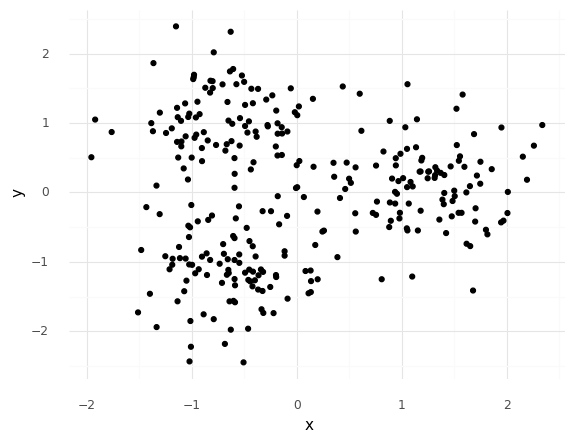

<ggplot: (197525614061)>

In [8]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

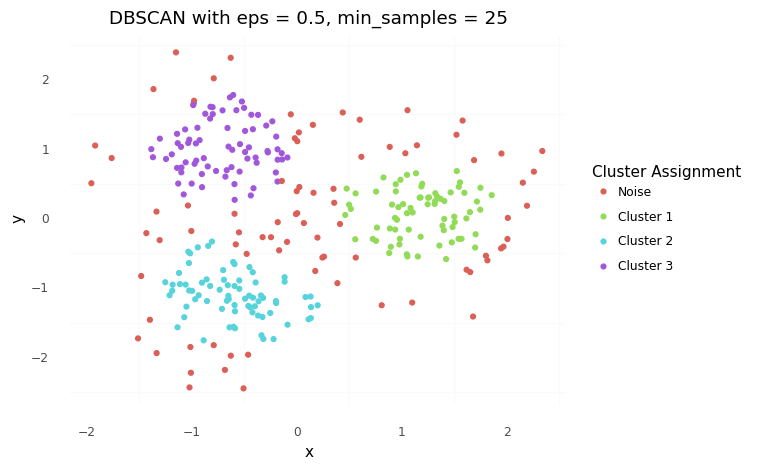

<ggplot: (197535041182)>

In [109]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

DBSCAN Score:  0.36278442651516923


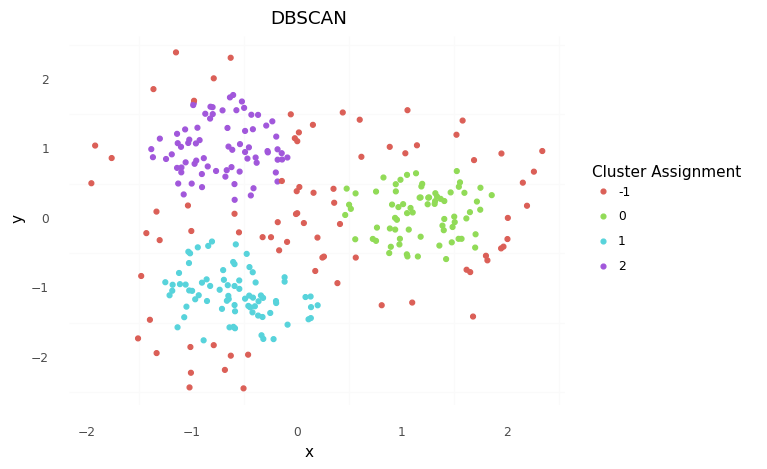


Hierarchical Agglomeretive Score:  0.5331004784160975


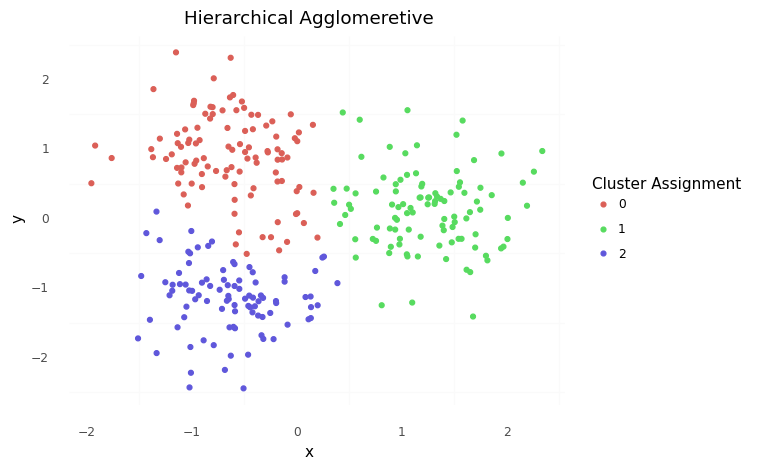


KMeans Score:  0.558315766313531


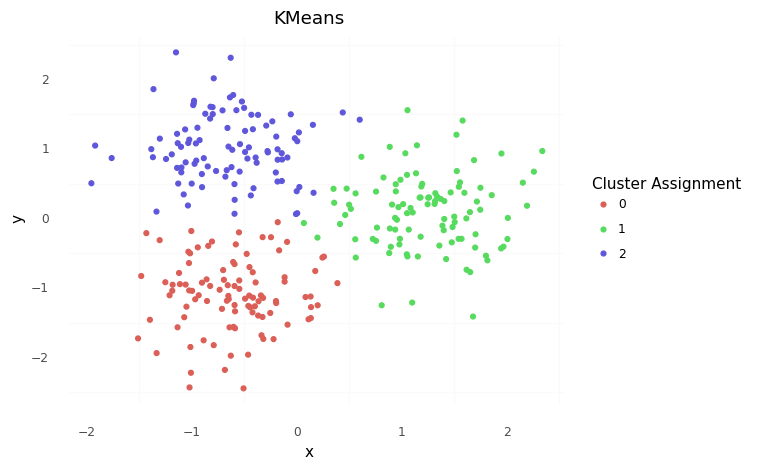


KMeans Score:  0.558315766313531


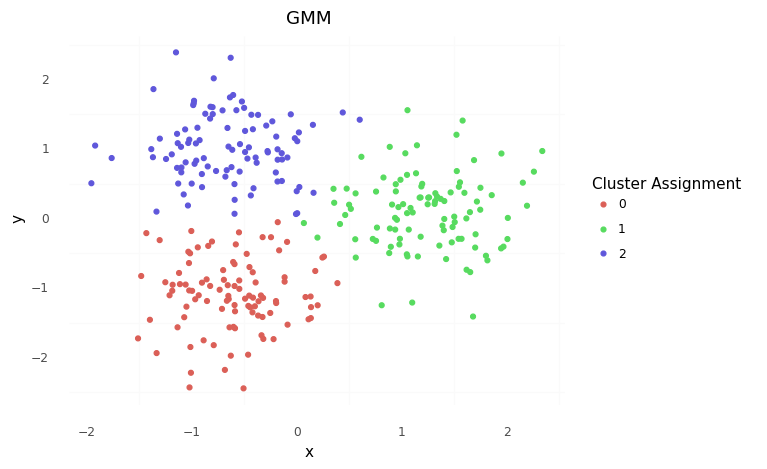

In [99]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac2 = AgglomerativeClustering(3)
km2 = KMeans(3)
gm2 = GaussianMixture(3)
db2 = DBSCAN(eps = 0.5, min_samples = 35)

hac2.fit(d2[["x","y"]])
km2.fit(d2[["x","y"]])
gm2.fit(d2[["x","y"]])
db2.fit(d2[["x","y"]])
d2["hac"] = hac2.labels_
d2["km"] = km2.labels_
d2["gm"] = gm2.predict(d2[["x","y"]])
d2['db'] = db2.labels_

print("DBSCAN Score: ",silhouette_score(d2[["x","y"]], d2["db"]))
print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))
print("Hierarchical Agglomeretive Score: ",silhouette_score(d2[["x","y"]], d2["hac"]))
print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print("KMeans Score: ",silhouette_score(d2[["x","y"]], d2["km"]))
print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print("KMeans Score: ",silhouette_score(d2[["x","y"]], d2["gm"]))
print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "GMM"))

## Dataset 3

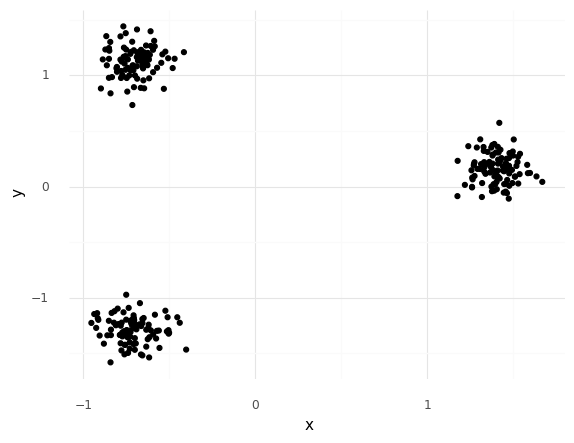

<ggplot: (197531581954)>

In [49]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

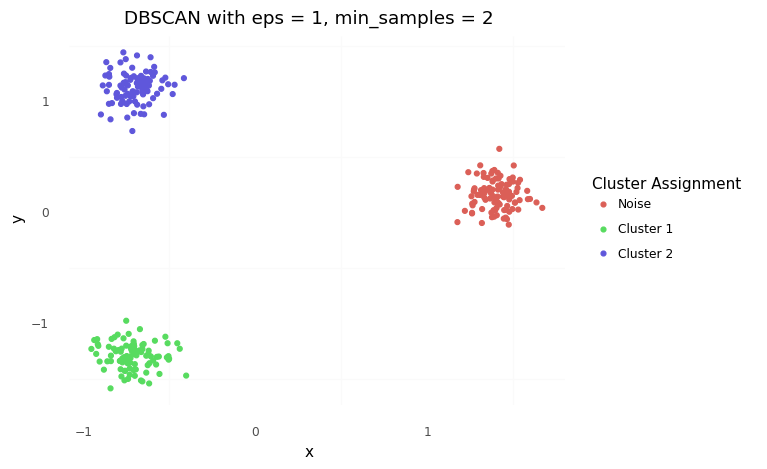

<ggplot: (197541024456)>

In [102]:
db3 = DBSCAN(eps = .5, min_samples = 3).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

DBSCAN:  0.913619050733588


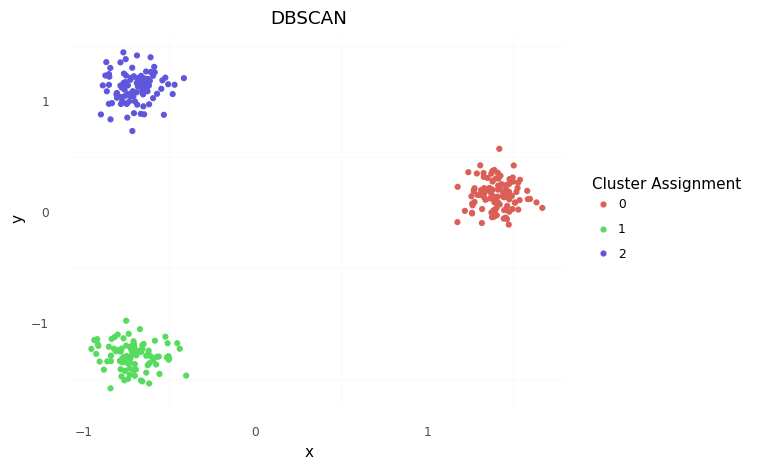


Hierarchical Agglomeretive:  0.913619050733588


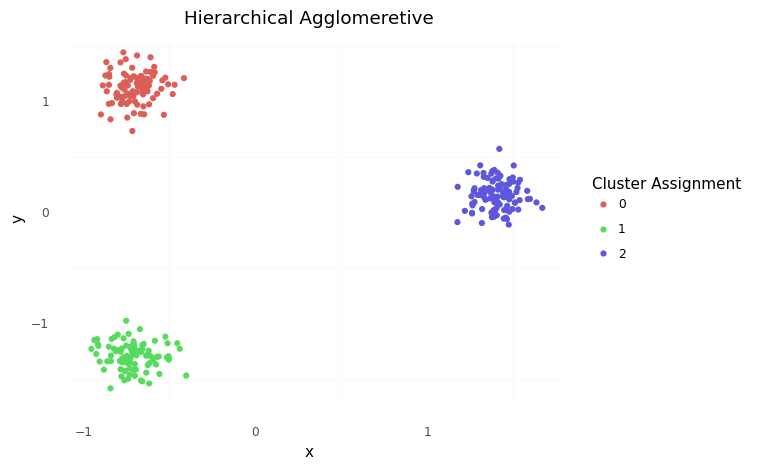


KMeans:  0.913619050733588


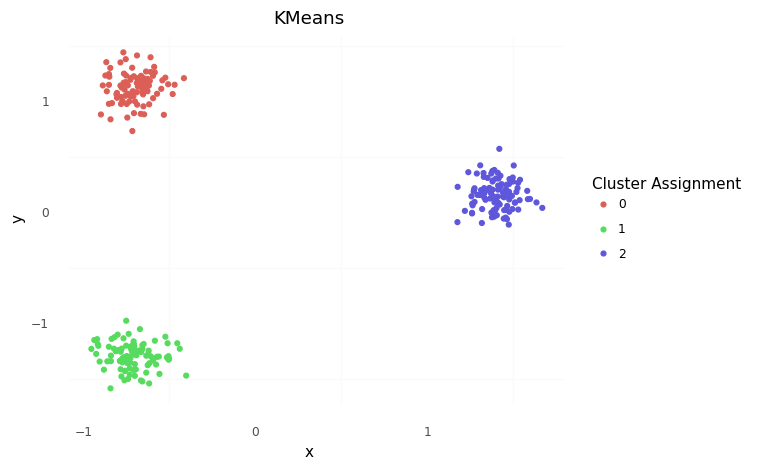


Gaussian Mixtures:  0.7270657965970438


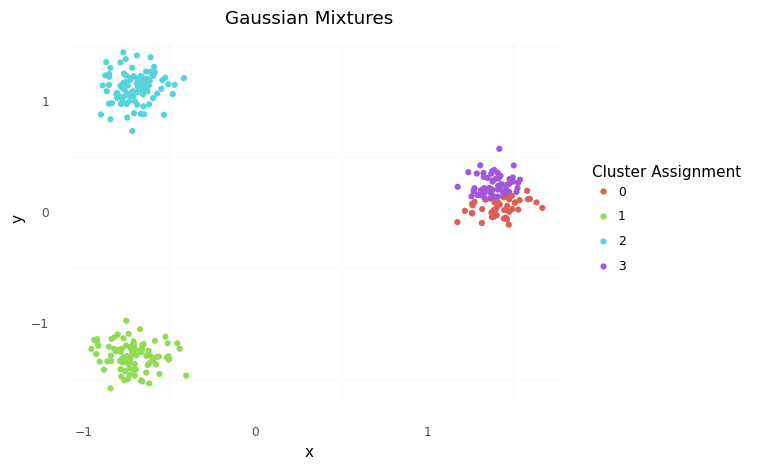

In [110]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac3 = AgglomerativeClustering(3)
km3 = KMeans(3)
gm3 = GaussianMixture(4)
db3 = DBSCAN(eps = 0.5, min_samples = 25)

hac3.fit(d3[["x","y"]])
km3.fit(d3[["x","y"]])
gm3.fit(d3[["x","y"]])
db3.fit(d3[["x","y"]])
d3["hac"] = hac3.labels_
d3["km"] = km3.labels_
d3["gm"] = gm3.predict(d3[["x","y"]])
d3['db'] = db3.labels_

print("DBSCAN: ",silhouette_score(d3[["x","y"]], d3["db"]))
print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))
print("Hierarchical Agglomeretive: ",silhouette_score(d3[["x","y"]], d3["hac"]))
print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print("KMeans: ",silhouette_score(d3[["x","y"]], d3["km"]))
print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print("Gaussian Mixtures: ",silhouette_score(d3[["x","y"]], d3["gm"]))
print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 4

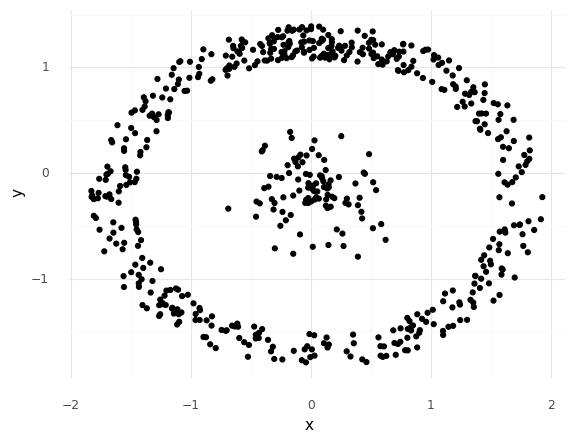

<ggplot: (197530706029)>

In [58]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

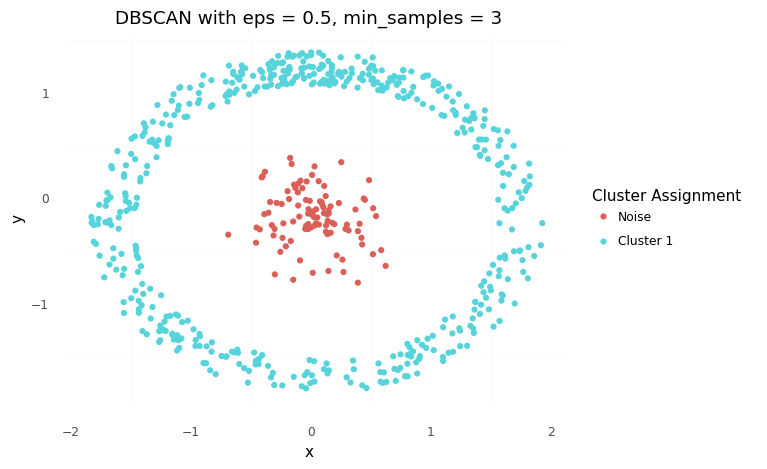

<ggplot: (197533035548)>

In [59]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

### Compare

DBSCAN:  -0.042911477754913246


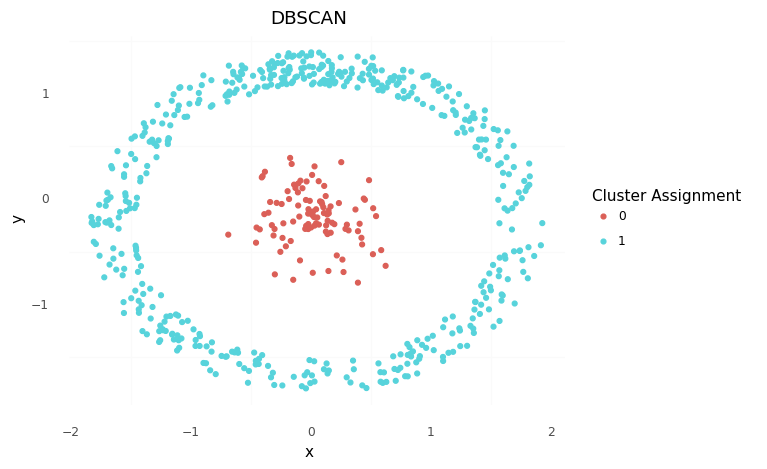


Hierarchical Agglomeretive:  0.4006200454291005


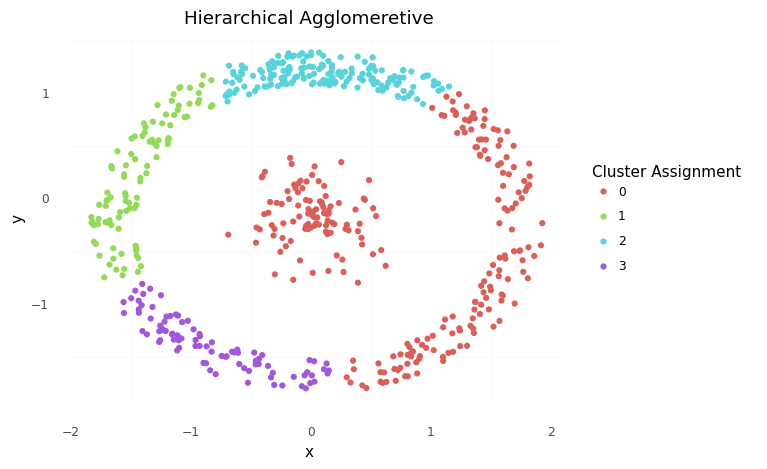


KMeans:  0.41040024530096303


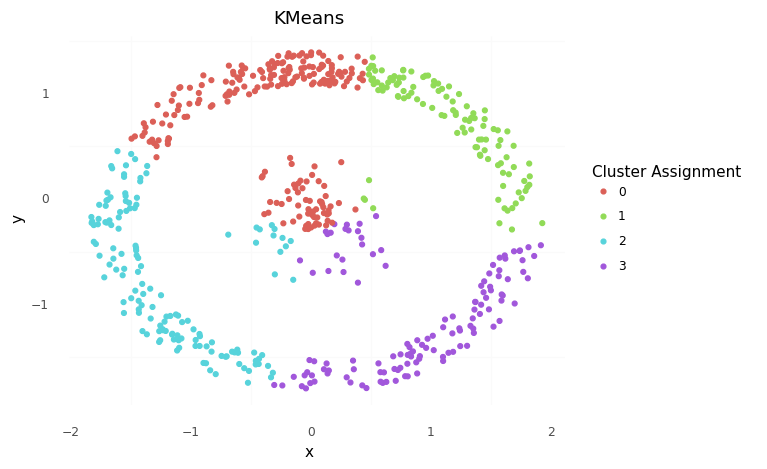


GMM:   0.4153202553880836


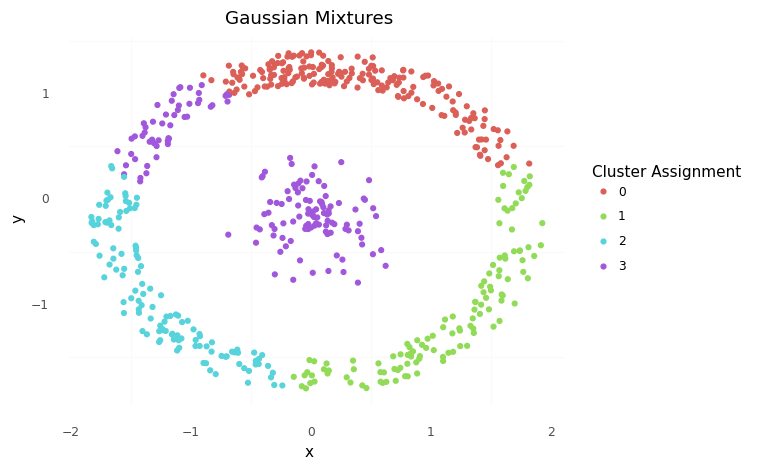

In [105]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
db = DBSCAN(eps = .5, min_samples = 10).fit(d4)
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])
db.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])
d4['db'] = db.labels_


print("DBSCAN: ",silhouette_score(d4[["x","y"]], d4["db"]))
print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))

print("Hierarchical Agglomeretive: ",silhouette_score(d4[["x","y"]], d4["hac"]))
print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print("KMeans: ",silhouette_score(d4[["x","y"]], d4["km"]))
print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print("GMM:  ",silhouette_score(d4[["x","y"]], d4["gm"]))
print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

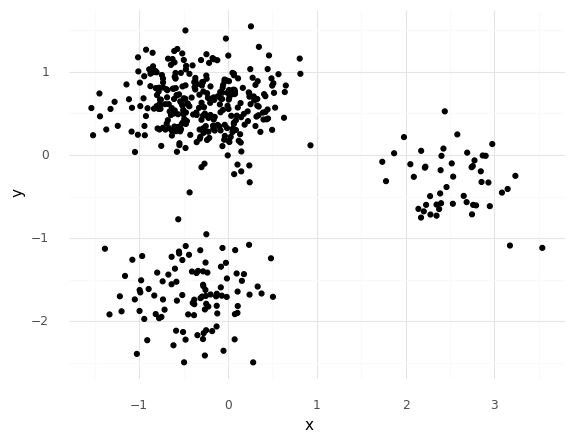

<ggplot: (197535513937)>

In [75]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

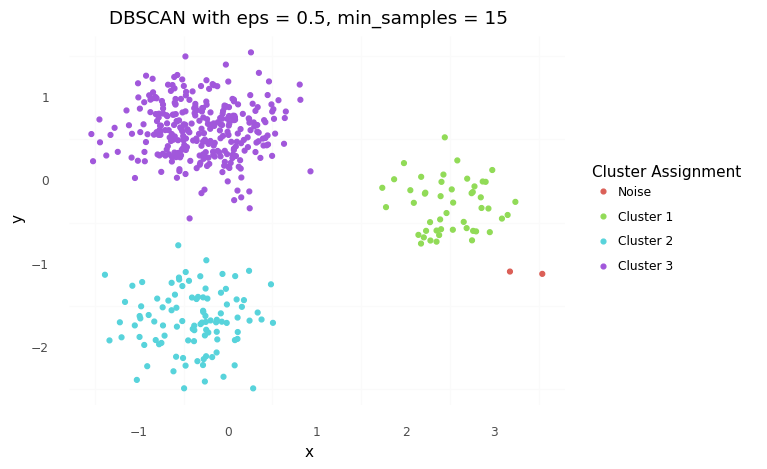

<ggplot: (8739114262797)>

In [ ]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [ ]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


DBSCAN:  0.6831718624955323


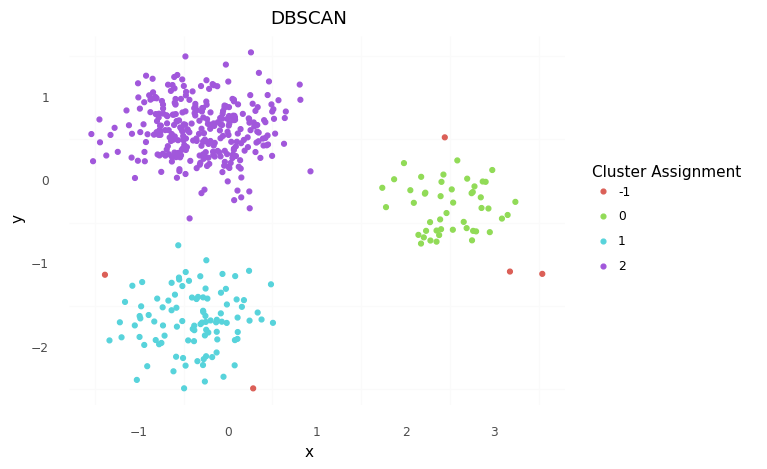


Hierarchical:  0.7031189213721805


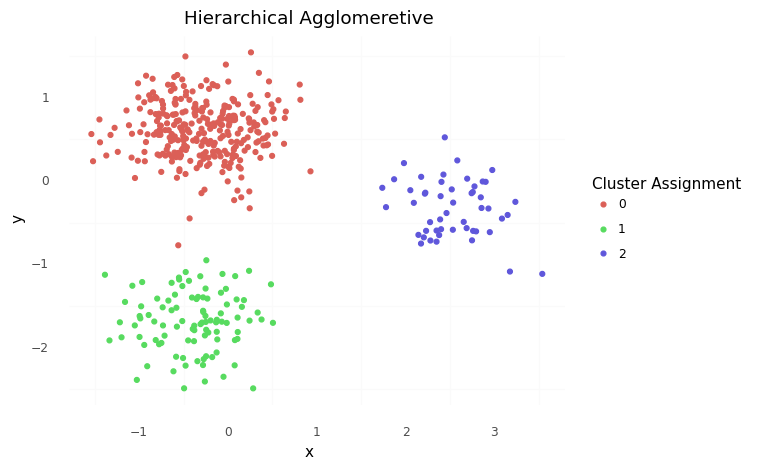


KMeans:  0.7043537508086658


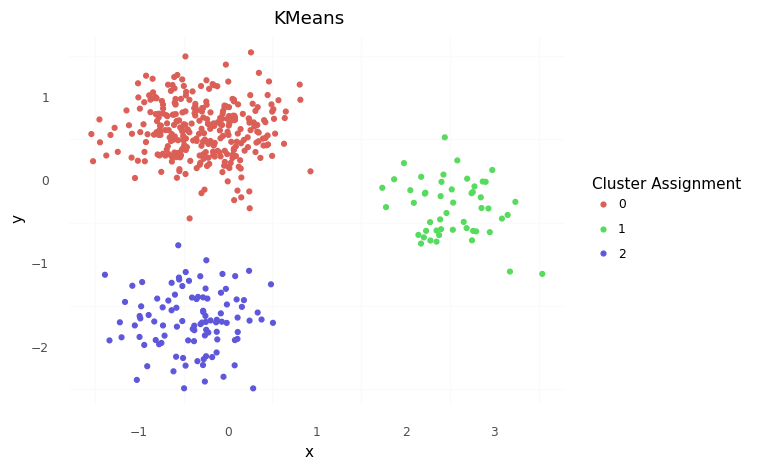


Gaussian Mixtures:  0.7043537508086658


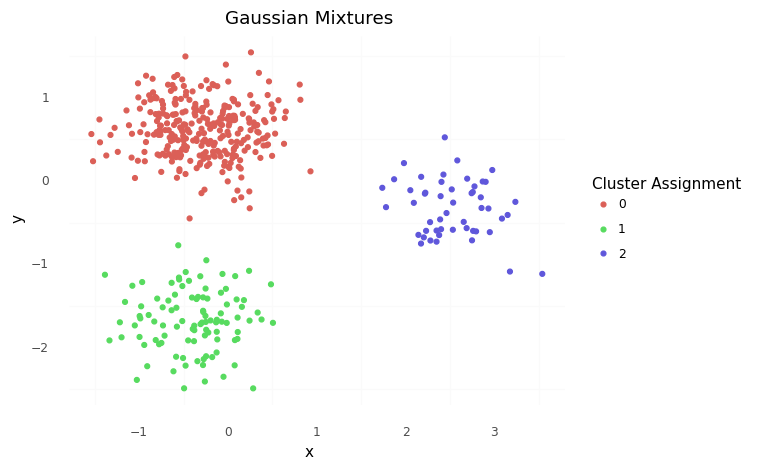

In [80]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac5 = AgglomerativeClustering(3)
km5 = KMeans(3)
gm5 = GaussianMixture(3)
db5 = DBSCAN(eps = 0.5, min_samples = 25)

hac5.fit(d5[["x","y"]])
km5.fit(d5[["x","y"]])
gm5.fit(d5[["x","y"]])
db5.fit(d5[["x","y"]])
d5["hac"] = hac5.labels_
d5["km"] = km5.labels_
d5["gm"] = gm5.predict(d5[["x","y"]])
d5['db'] = db5.labels_

print("DBSCAN: ",silhouette_score(d5[["x","y"]], d5["db"]))
print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))
print("Hierarchical: ",silhouette_score(d5[["x","y"]], d5["hac"]))
print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print("KMeans: ",silhouette_score(d5[["x","y"]], d5["km"]))
print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print("Gaussian Mixtures: ",silhouette_score(d5[["x","y"]], d5["gm"]))
print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

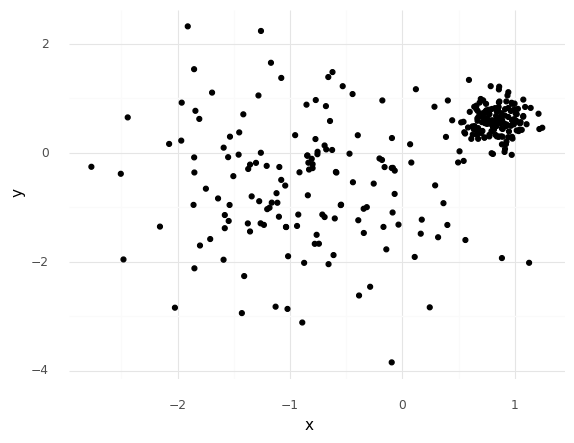

<ggplot: (145122525287)>

In [6]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [7]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins+1)

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.45863691, 0.62402991, 0.6937056 ],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]])

In [8]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

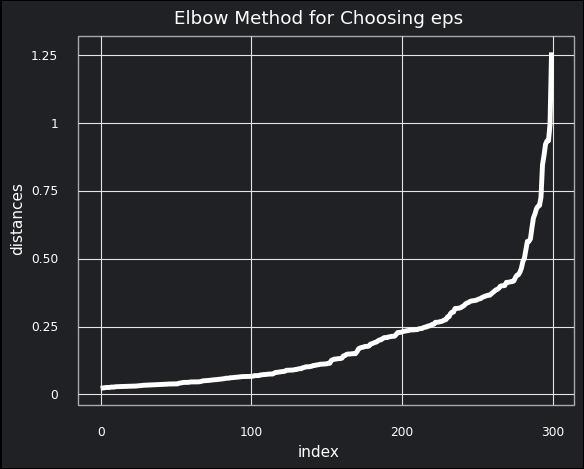

<ggplot: (145124722505)>

In [9]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

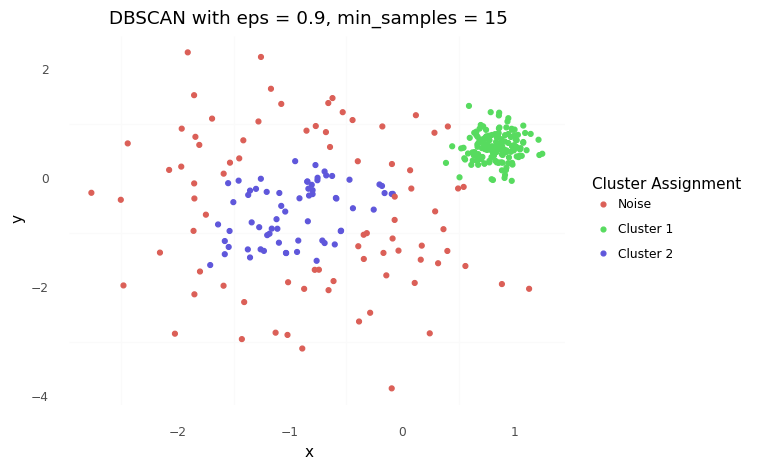

<ggplot: (197526647628)>

In [90]:
db6 = DBSCAN(eps = 0.50, min_samples = 15).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [10]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

AttributeError: 'DataFrame' object has no attribute 'assignments'

0.5726927612359103


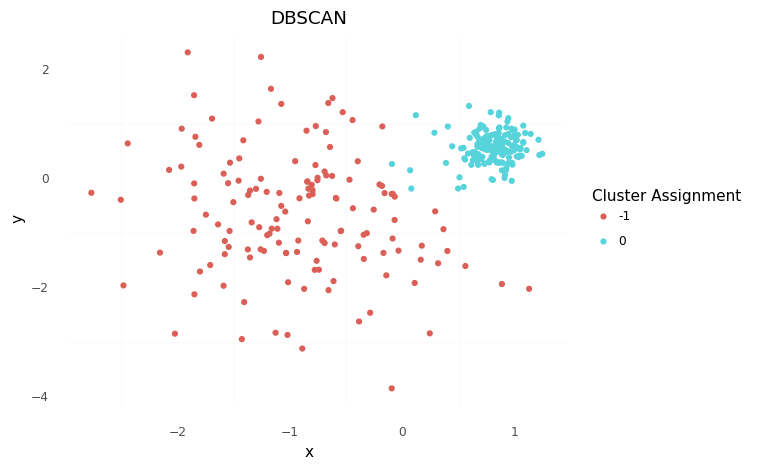


0.5538801329572542


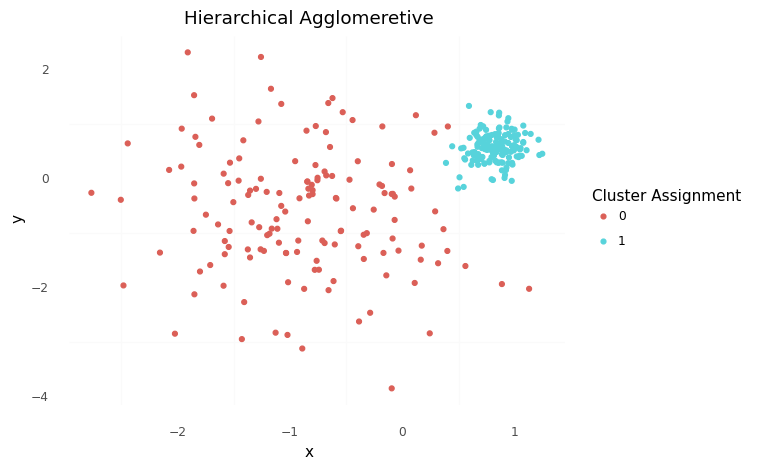


0.5829742988895884


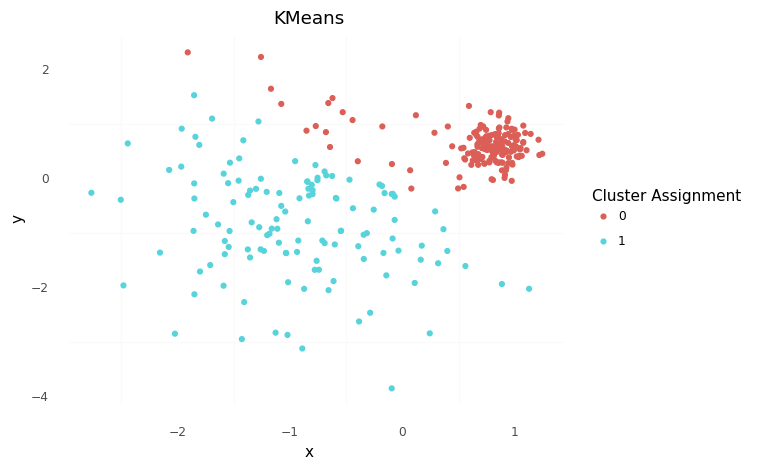


0.5531426830972709


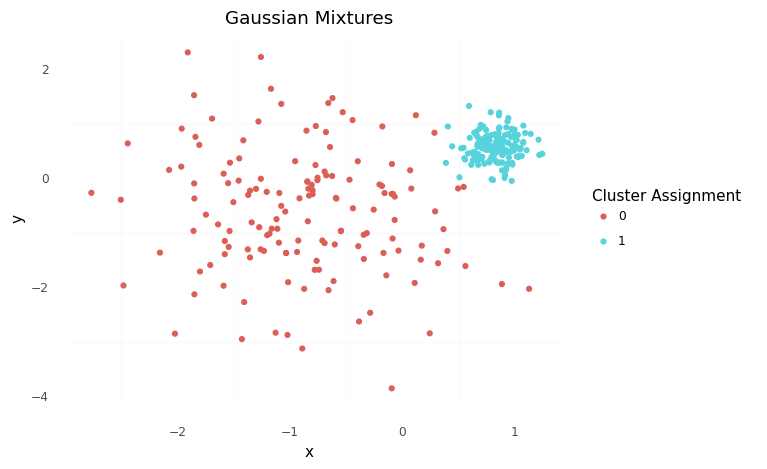

In [111]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac6 = AgglomerativeClustering(2)
km6 = KMeans(2)
gm6 = GaussianMixture(2)
db6 = DBSCAN(eps = 0.50, min_samples = 40)

hac6.fit(d6[["x","y"]])
km6.fit(d6[["x","y"]])
gm6.fit(d6[["x","y"]])
db6.fit(d6[["x","y"]])
d6["hac"] = hac6.labels_
d6["km"] = km6.labels_
d6["gm"] = gm6.predict(d6[["x","y"]])
d6['db'] = db6.labels_

print(silhouette_score(d6[["x","y"]], d6["db"]))
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))
print(silhouette_score(d6[["x","y"]], d6["hac"]))
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

print(silhouette_score(d6[["x","y"]], d6["km"]))
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))

print(silhouette_score(d6[["x","y"]], d6["gm"]))
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))